In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
X = pd.read_csv('challenge_data/X_train.csv')
y = pd.read_csv('challenge_data/y_train.csv')

In [6]:
null_counts = X.isnull().sum()
print("Null Values in Each Column:")
print(null_counts)

Null Values in Each Column:
ID                    0
DAY_ID                0
COUNTRY               0
DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              94
FR_RAIN              94
DE_WIND              94
FR_WIND              94
DE_TEMP              94
FR_TEMP              94
GAS_RET               0
COAL_RET              0
CARBON_RET            0
dtype: int64


In [82]:
y

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733
...,...,...
1489,459,-0.172597
1490,1674,-0.063546
1491,748,0.151797
1492,1454,-0.640917


In [22]:
X = X.sort_values("DAY_ID")

In [79]:
de = X[X['COUNTRY'] == 'DE']

In [35]:
fr = X[X['COUNTRY'] == 'FR']
fr_plot = fr[:200]
fr[fr['DE_FR_EXCHANGE'].isnull()]

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
61,936,28,FR,1.408520,1.391108,NaN,NaN,NaN,NaN,NaN,...,1.486483,-0.967634,0.555446,-0.510427,-0.985396,-0.885387,-0.298126,-0.236740,0.616277,0.787153
39,935,52,FR,1.231695,1.269656,NaN,NaN,NaN,NaN,NaN,...,1.264296,-1.228214,0.962364,-0.462356,-0.364924,-1.044338,0.456897,0.078996,-0.606772,0.270359
468,951,58,FR,1.472340,2.439284,NaN,NaN,NaN,NaN,NaN,...,2.523329,-0.155963,0.868849,-1.222456,-0.659191,-1.486098,-1.936584,0.223220,0.849366,0.879215
1357,937,65,FR,1.075988,1.276328,NaN,NaN,NaN,NaN,NaN,...,1.391707,-0.679139,0.036572,-1.324837,-0.784565,-0.282143,0.513167,-0.435396,0.556208,0.131572
1320,956,75,FR,1.383749,2.236917,NaN,NaN,NaN,NaN,NaN,...,2.129408,-0.318578,-0.066699,-0.709662,-0.546329,-1.086671,-1.332688,0.226180,-1.192092,-0.332399
299,958,126,FR,1.203701,1.399900,NaN,NaN,NaN,NaN,NaN,...,1.585094,0.918051,0.167931,-0.673886,-1.034774,-0.688666,-0.258374,0.318572,-0.082472,0.935613
1087,957,157,FR,1.664367,1.665369,NaN,NaN,NaN,NaN,NaN,...,1.642085,0.457497,1.832659,-0.383511,-0.917849,-1.458492,0.110873,-0.676501,-0.245869,-0.807220
877,952,159,FR,1.445497,2.447421,NaN,NaN,NaN,NaN,NaN,...,2.646770,-0.073815,-0.322790,-1.538436,-1.355023,-1.679708,-1.693058,-2.492647,0.568863,-0.772683
459,953,186,FR,1.418318,2.410895,NaN,NaN,NaN,NaN,NaN,...,2.344515,-0.387011,0.113151,-1.306267,-1.157183,-1.562302,-1.963222,-1.749550,0.474484,0.006498
1050,965,212,FR,1.840984,3.079180,NaN,NaN,NaN,NaN,NaN,...,2.918326,-0.321000,-0.846733,-0.528320,-0.454867,-3.998837,-3.964949,-1.255258,2.124227,0.260547


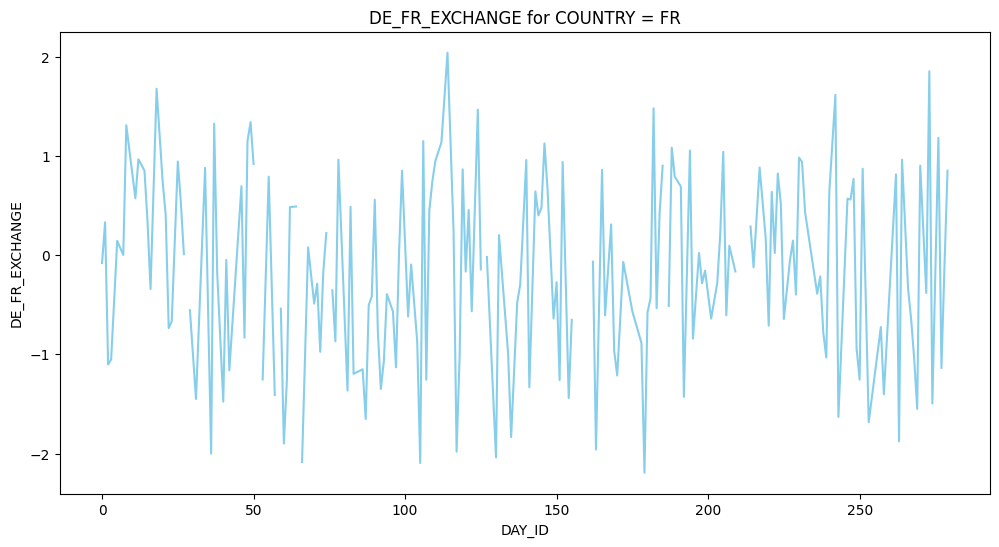

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(fr_plot['DAY_ID'], fr_plot['DE_FR_EXCHANGE'], linestyle='-', color='skyblue')
plt.xlabel('DAY_ID')
plt.ylabel('DE_FR_EXCHANGE')
plt.title('DE_FR_EXCHANGE for COUNTRY = FR')
plt.savefig('images/fr_exchange_null.png')
plt.show()

In [40]:
fr[fr['FR_NET_EXPORT'].isnull()]

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
61,936,28,FR,1.408520,1.391108,NaN,NaN,NaN,NaN,NaN,...,1.486483,-0.967634,0.555446,-0.510427,-0.985396,-0.885387,-0.298126,-0.236740,0.616277,0.787153
614,1021,29,FR,0.530319,-0.566085,-0.555051,0.555051,NaN,NaN,NaN,...,-0.370090,0.214589,0.012755,-0.530967,-1.030422,0.804944,0.611515,0.121422,0.689455,-0.021530
1375,993,50,FR,0.511014,0.069335,0.918642,-0.918642,NaN,NaN,NaN,...,0.223836,2.363869,0.017478,-0.863228,-0.627465,0.990850,0.211675,-0.046202,1.012198,0.810468
39,935,52,FR,1.231695,1.269656,NaN,NaN,NaN,NaN,NaN,...,1.264296,-1.228214,0.962364,-0.462356,-0.364924,-1.044338,0.456897,0.078996,-0.606772,0.270359
468,951,58,FR,1.472340,2.439284,NaN,NaN,NaN,NaN,NaN,...,2.523329,-0.155963,0.868849,-1.222456,-0.659191,-1.486098,-1.936584,0.223220,0.849366,0.879215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,990,1153,FR,0.860181,0.470422,0.671038,-0.671038,NaN,NaN,NaN,...,0.358199,1.221839,0.209827,0.087945,-0.666912,0.449077,-0.224944,0.797473,-1.223072,-0.084172
923,963,1171,FR,1.250809,2.219071,NaN,NaN,NaN,NaN,NaN,...,1.987046,-1.198854,-0.471321,-0.797397,-0.292917,-1.945030,-2.285661,-0.257892,0.364250,-3.610462
331,969,1173,FR,0.759177,1.259905,1.454368,-1.454368,NaN,NaN,NaN,...,1.270345,0.002752,-0.626431,-0.807145,-1.209736,-0.809211,0.349555,1.549771,0.853510,-0.832626
537,1018,1186,FR,-1.790916,-1.161327,-0.490623,0.490623,NaN,NaN,NaN,...,-1.009067,-0.647874,-0.900898,-0.320731,-1.100227,0.094048,0.198600,0.482342,0.786913,0.528879


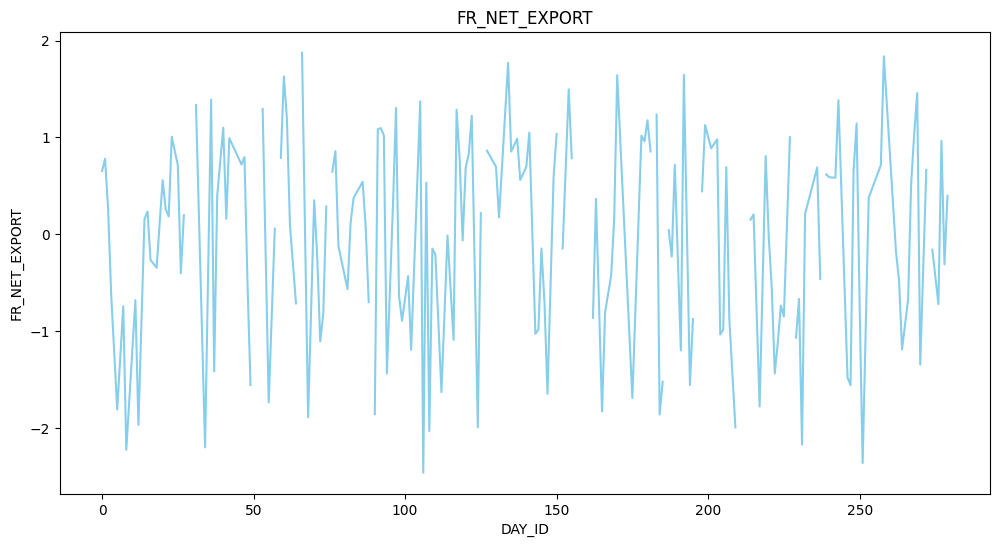

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(fr_plot['DAY_ID'], fr_plot['FR_NET_EXPORT'], linestyle='-', color='skyblue')
plt.xlabel('DAY_ID')
plt.ylabel('FR_NET_EXPORT')
plt.title('FR_NET_EXPORT')
plt.savefig('images/fr_export_null.png')
plt.show()

In [41]:
fr[fr['FR_NET_IMPORT'].isnull()]

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
61,936,28,FR,1.408520,1.391108,NaN,NaN,NaN,NaN,NaN,...,1.486483,-0.967634,0.555446,-0.510427,-0.985396,-0.885387,-0.298126,-0.236740,0.616277,0.787153
614,1021,29,FR,0.530319,-0.566085,-0.555051,0.555051,NaN,NaN,NaN,...,-0.370090,0.214589,0.012755,-0.530967,-1.030422,0.804944,0.611515,0.121422,0.689455,-0.021530
1375,993,50,FR,0.511014,0.069335,0.918642,-0.918642,NaN,NaN,NaN,...,0.223836,2.363869,0.017478,-0.863228,-0.627465,0.990850,0.211675,-0.046202,1.012198,0.810468
39,935,52,FR,1.231695,1.269656,NaN,NaN,NaN,NaN,NaN,...,1.264296,-1.228214,0.962364,-0.462356,-0.364924,-1.044338,0.456897,0.078996,-0.606772,0.270359
468,951,58,FR,1.472340,2.439284,NaN,NaN,NaN,NaN,NaN,...,2.523329,-0.155963,0.868849,-1.222456,-0.659191,-1.486098,-1.936584,0.223220,0.849366,0.879215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,990,1153,FR,0.860181,0.470422,0.671038,-0.671038,NaN,NaN,NaN,...,0.358199,1.221839,0.209827,0.087945,-0.666912,0.449077,-0.224944,0.797473,-1.223072,-0.084172
923,963,1171,FR,1.250809,2.219071,NaN,NaN,NaN,NaN,NaN,...,1.987046,-1.198854,-0.471321,-0.797397,-0.292917,-1.945030,-2.285661,-0.257892,0.364250,-3.610462
331,969,1173,FR,0.759177,1.259905,1.454368,-1.454368,NaN,NaN,NaN,...,1.270345,0.002752,-0.626431,-0.807145,-1.209736,-0.809211,0.349555,1.549771,0.853510,-0.832626
537,1018,1186,FR,-1.790916,-1.161327,-0.490623,0.490623,NaN,NaN,NaN,...,-1.009067,-0.647874,-0.900898,-0.320731,-1.100227,0.094048,0.198600,0.482342,0.786913,0.528879


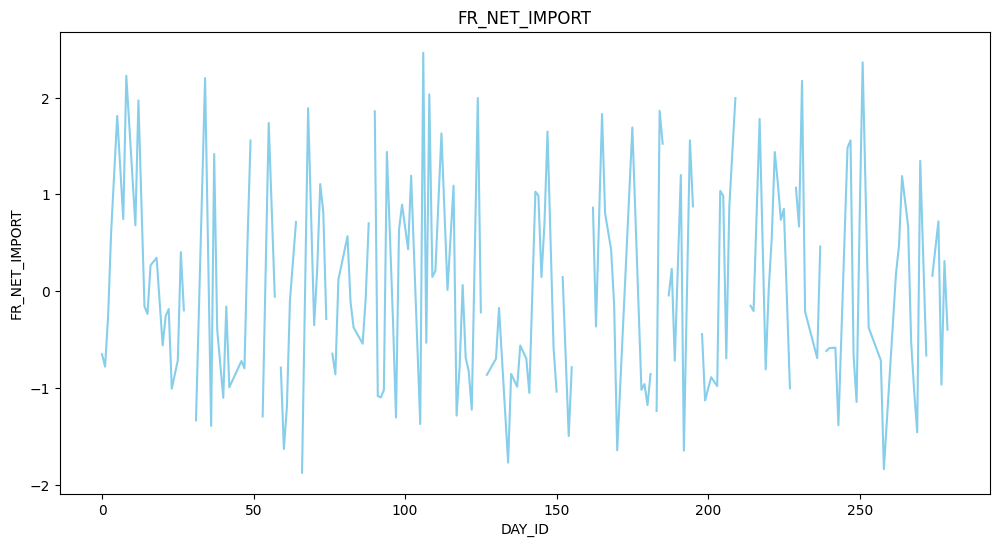

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(fr_plot['DAY_ID'], fr_plot['FR_NET_IMPORT'], linestyle='-', color='skyblue')
plt.xlabel('DAY_ID')
plt.ylabel('FR_NET_IMPORT')
plt.title('FR_NET_IMPORT')
plt.savefig('images/fr_import_null.png')
plt.show()

In [46]:
fr[fr['FR_RAIN'].isnull()]

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
101,1712,11,FR,0.960072,0.893360,0.572874,-0.572874,-0.431157,-0.681410,0.431157,...,0.802531,NaN,NaN,NaN,NaN,NaN,NaN,1.497554,0.885105,0.906909
26,1715,27,FR,0.710437,0.302015,0.010281,-0.010281,-0.574293,0.197104,0.574293,...,0.373842,NaN,NaN,NaN,NaN,NaN,NaN,0.065680,-1.250163,-0.240992
1138,1686,73,FR,1.650742,2.291531,-0.172069,0.172069,-0.061632,-0.821459,0.061632,...,1.914886,NaN,NaN,NaN,NaN,NaN,NaN,-0.235566,1.240369,0.289073
758,1706,74,FR,1.287193,0.555468,0.223346,-0.223346,1.486049,0.286253,-1.486049,...,-0.201348,NaN,NaN,NaN,NaN,NaN,NaN,0.631231,0.920510,0.354582
393,1696,96,FR,0.809707,0.286354,-0.569527,0.569527,-0.858605,0.293767,0.858605,...,0.278825,NaN,NaN,NaN,NaN,NaN,NaN,0.412395,-1.061074,-0.166493
478,1703,98,FR,1.163739,0.993851,0.014411,-0.014411,-0.247227,-0.636112,0.247227,...,1.024856,NaN,NaN,NaN,NaN,NaN,NaN,0.929566,1.628401,0.964213
59,1709,130,FR,1.066915,0.807366,-2.039503,2.039503,-1.618459,0.696194,1.618459,...,0.379480,NaN,NaN,NaN,NaN,NaN,NaN,1.573358,1.414529,0.356393
534,1681,155,FR,1.094086,0.682399,-0.652040,0.652040,0.210913,0.784182,-0.210913,...,0.827539,NaN,NaN,NaN,NaN,NaN,NaN,1.026604,0.940184,0.307300
144,1694,253,FR,0.903682,0.117425,-1.682975,1.682975,-0.414103,0.376951,0.414103,...,-0.176061,NaN,NaN,NaN,NaN,NaN,NaN,0.274211,0.508566,0.186006
624,1671,262,FR,1.336711,1.260471,0.814849,-0.814849,0.875276,-0.182089,-0.875276,...,1.175926,NaN,NaN,NaN,NaN,NaN,NaN,0.432061,0.149860,1.523092


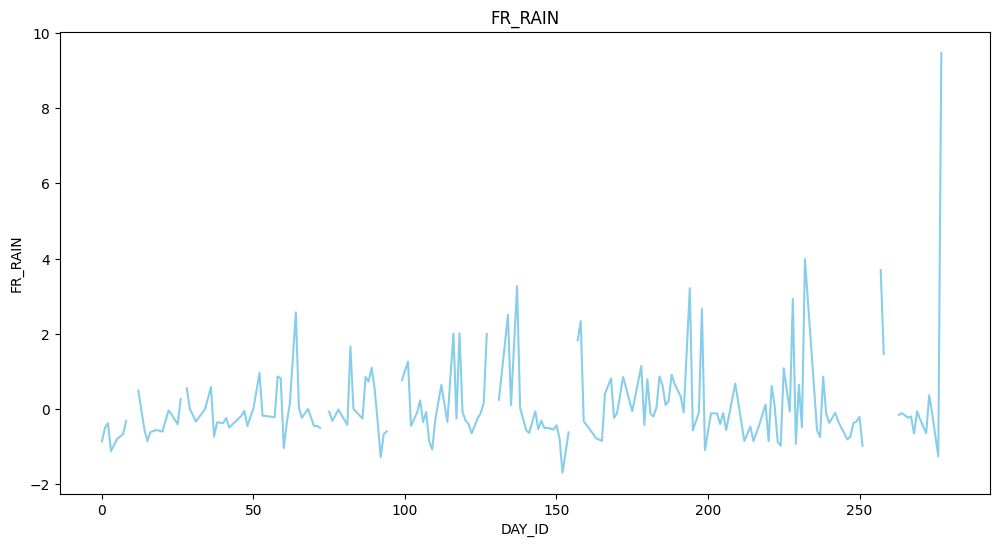

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(fr_plot['DAY_ID'], fr_plot['FR_RAIN'], linestyle='-', color='skyblue')
plt.xlabel('DAY_ID')
plt.ylabel('FR_RAIN')
plt.title('FR_RAIN')
plt.savefig('images/fr_rain_null.png')
plt.show()

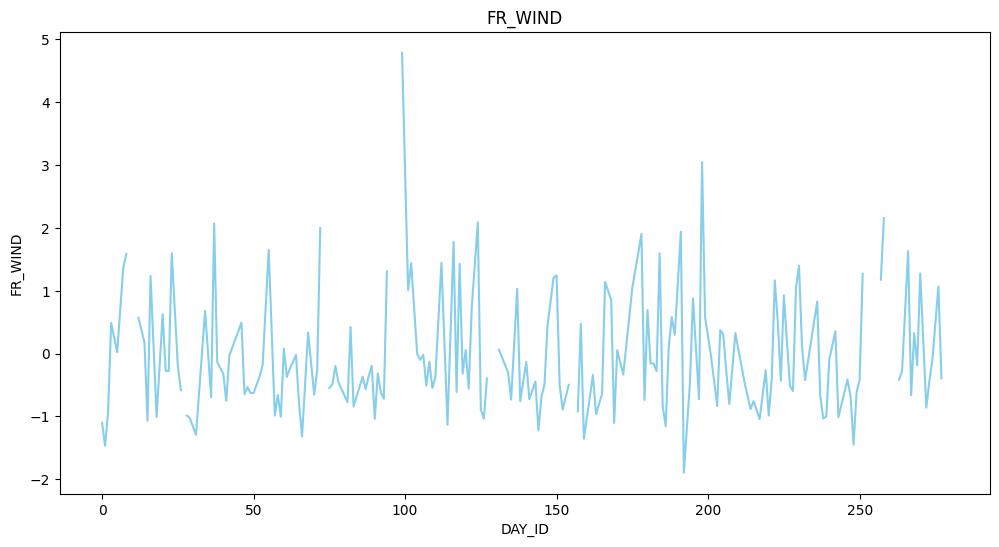

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(fr_plot['DAY_ID'], fr_plot['FR_WIND'], linestyle='-', color='skyblue')
plt.xlabel('DAY_ID')
plt.ylabel('FR_WIND')
plt.title('FR_WIND')
plt.savefig('images/fr_wind_null.png')
plt.show()

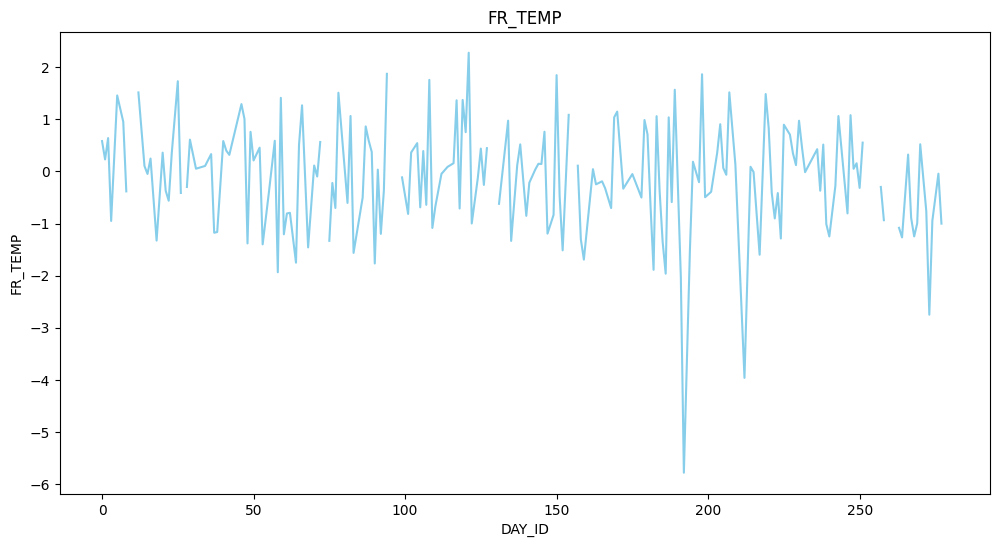

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(fr_plot['DAY_ID'], fr_plot['FR_TEMP'], linestyle='-', color='skyblue')
plt.xlabel('DAY_ID')
plt.ylabel('FR_TEMP')
plt.title('FR_TEMP')
plt.savefig('images/fr_temp_null.png')
plt.show()

In [64]:
def fill_missing_with_average(df):
    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Iterate over each row in the column
        for i in range(len(df[col])):
            # Check if the value is missing
            if pd.isnull(df.iloc[i][col]):
                # Find the nearest non-missing value by moving backward
                j = i - 1
                while j >= 0 and pd.isnull(df.iloc[j][col]):
                    j -= 1
                
                # Find the nearest non-missing value by moving forward
                k = i + 1
                while k < len(df[col]) and pd.isnull(df.iloc[k][col]):
                    k += 1

                # Calculate the average of the nearest non-missing values
                if j >= 0 and k < len(df[col]):
                    average_value = (df.iloc[j][col] + df.iloc[k][col]) / 2
                elif j >= 0:
                    average_value = df.iloc[j][col]
                elif k < len(df[col]):
                    average_value = df.iloc[k][col]
                else:
                    # If no non-missing values are found, set to 0 (or any default value)
                    average_value = 0
                
                # Fill the missing value with the calculated average
                df.iloc[i, df.columns.get_loc(col)] = average_value
    
    return df

In [65]:
fr_filled = fill_missing_with_average(fr)

In [66]:
null_counts = fr_filled.isnull().sum()
print("Null Values in Each Column:")
print(null_counts)

Null Values in Each Column:
ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
dtype: int64


In [67]:
fr_fill_plot = fr_filled[:200]

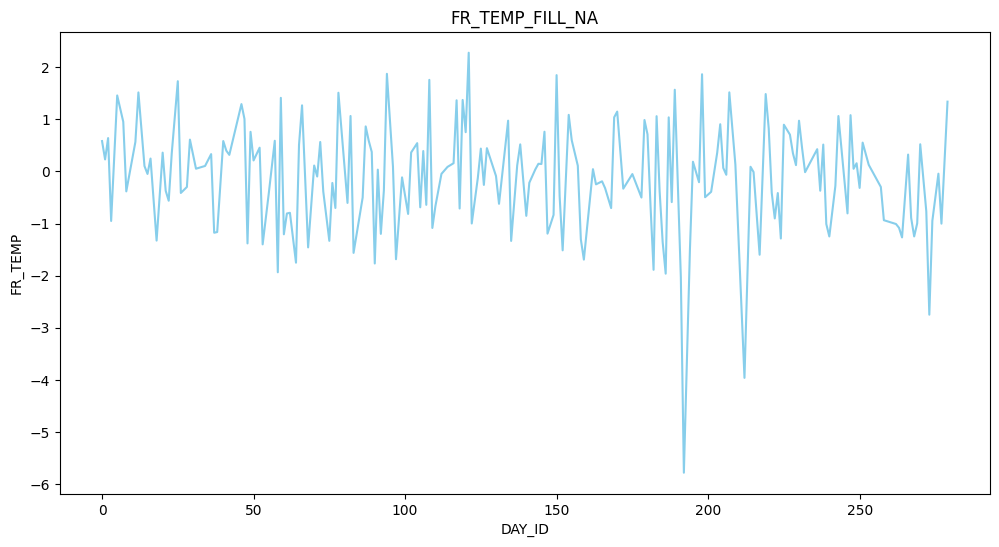

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(fr_fill_plot['DAY_ID'], fr_fill_plot['FR_TEMP'], linestyle='-', color='skyblue')
plt.xlabel('DAY_ID')
plt.ylabel('FR_TEMP')
plt.title('FR_TEMP_FILL_NA')
plt.savefig('images/fr_temp.png')
plt.show()

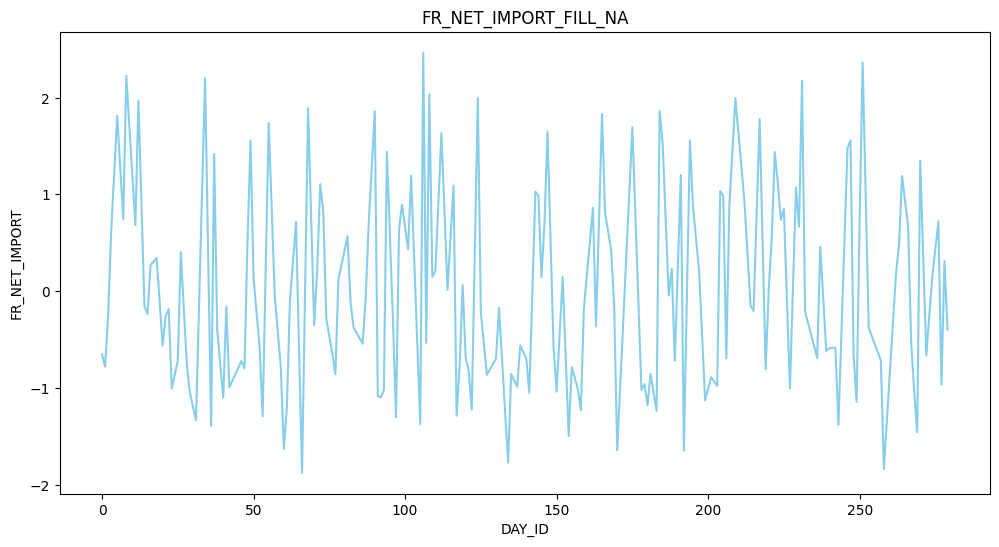

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(fr_fill_plot['DAY_ID'], fr_fill_plot['FR_NET_IMPORT'], linestyle='-', color='skyblue')
plt.xlabel('DAY_ID')
plt.ylabel('FR_NET_IMPORT')
plt.title('FR_NET_IMPORT_FILL_NA')
plt.savefig('images/fr_net_import.png')
plt.show()

In [78]:
fr

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
742,1057,0,FR,0.048418,-0.465067,-0.079296,0.079296,0.405549,0.650577,-0.405549,...,-0.344706,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003
1211,1179,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,...,1.214288,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047
1408,1327,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434
329,2016,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-0.856321,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756
512,2047,5,FR,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,-0.552878,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745,-0.117977,0.550433,0.781870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2039,1208,FR,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-0.666261,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105,0.291714,0.568479,0.395742
1451,972,1209,FR,1.109804,1.301061,1.565552,-1.565552,-0.358154,-1.233963,0.358154,...,1.038585,0.457145,-0.202629,-0.395438,-0.463636,-0.251075,-0.387127,-0.411589,1.774694,1.038661
1007,1987,1212,FR,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.589767,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792
873,1688,1213,FR,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,...,0.868310,-0.342771,0.250384,0.227416,0.120661,-0.477558,0.223629,-0.103642,-0.633007,0.214805


In [81]:
de

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
1468,111,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434
680,800,3,DE,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-0.856321,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756
991,831,5,DE,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,-0.552878,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745,-0.117977,0.550433,0.781870
1356,779,7,DE,0.057599,-0.625625,0.002239,-0.002239,-0.676226,-0.745182,0.676226,...,-0.806379,-0.531862,-0.663419,0.098940,1.367421,-0.812164,0.954384,-0.379980,0.518459,-0.034642
713,841,8,DE,-0.282744,-0.700027,1.309253,-1.309253,0.248085,-2.226840,-0.248085,...,-0.791016,1.522720,-0.307449,1.690497,1.584210,-0.441943,-0.382423,1.557325,0.146634,2.329924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,282,1202,DE,-1.182561,-1.259840,-1.201004,1.201004,-1.616737,0.619501,1.616737,...,-1.359708,-0.085663,-0.997403,-0.595651,-0.777719,0.039450,1.411276,0.184767,0.257420,0.507079
1136,505,1207,DE,1.002463,0.516789,0.651648,-0.651648,0.728817,-0.820640,-0.728817,...,0.236243,NaN,NaN,NaN,NaN,NaN,NaN,0.099209,1.750872,0.646905
577,823,1208,DE,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-0.666261,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105,0.291714,0.568479,0.395742
986,771,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.589767,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792


In [90]:
X_filled = fill_missing_with_average(X)

In [91]:
X_coor = X_filled.drop(['ID', 'DAY_ID', 'COUNTRY'], axis = 1)
X_coor

,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
742,0.048418,-0.465067,-0.079296,0.079296,0.405549,0.650577,-0.405549,-0.650577,0.592572,-0.261565,...,-0.344706,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003
1211,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,-0.778627,1.111008,1.991028,...,1.214288,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047
1408,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,1.228079,0.458302,...,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434
1468,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,1.228079,0.458302,...,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434
329,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,0.612133,1.588542,0.069297,...,-0.856321,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,0.789824,0.231723,0.625656,...,-0.589767,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792
986,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,0.789824,0.231723,0.625656,...,-0.589767,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792
1465,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,0.069222,1.781433,1.549682,...,0.868310,-0.342771,0.250384,0.227416,0.120661,-0.477558,0.223629,-0.103642,-0.633007,0.214805
873,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,0.069222,1.781433,1.549682,...,0.868310,-0.494467,0.494292,-0.337982,-0.380984,-0.362418,0.489559,-0.103642,-0.633007,0.214805


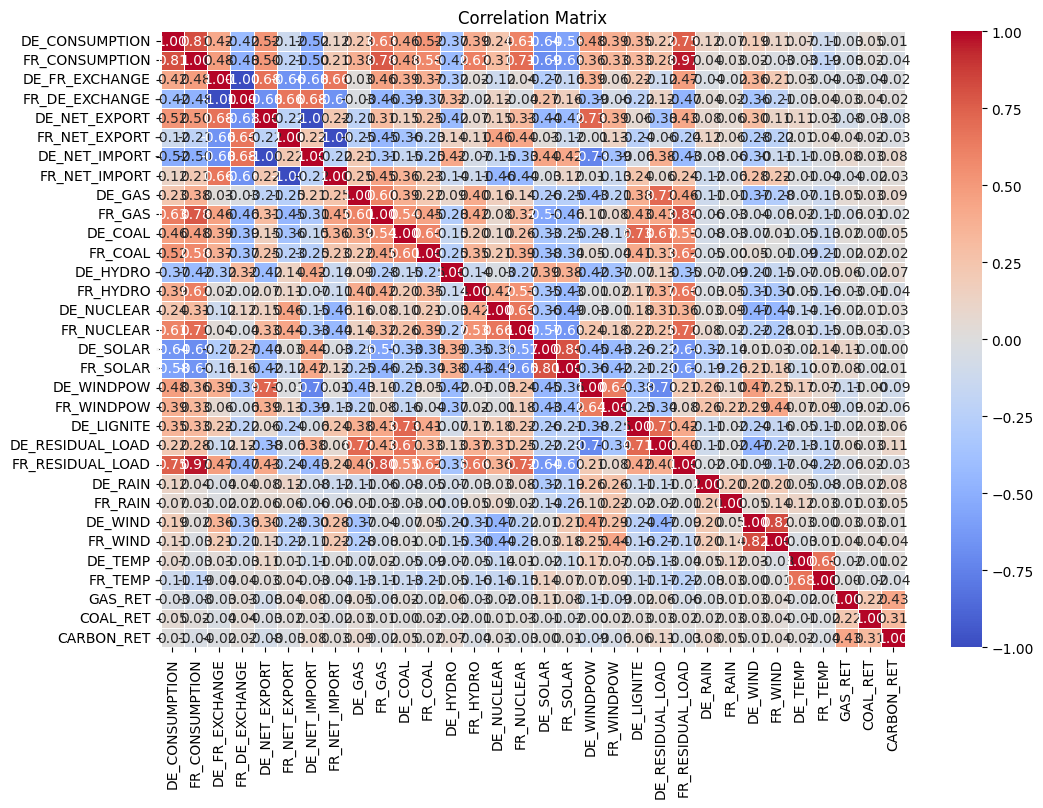

In [114]:
import seaborn as sns

correlation_matrix = X_coor.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.savefig('images/correlation_matrix.png')
plt.show()

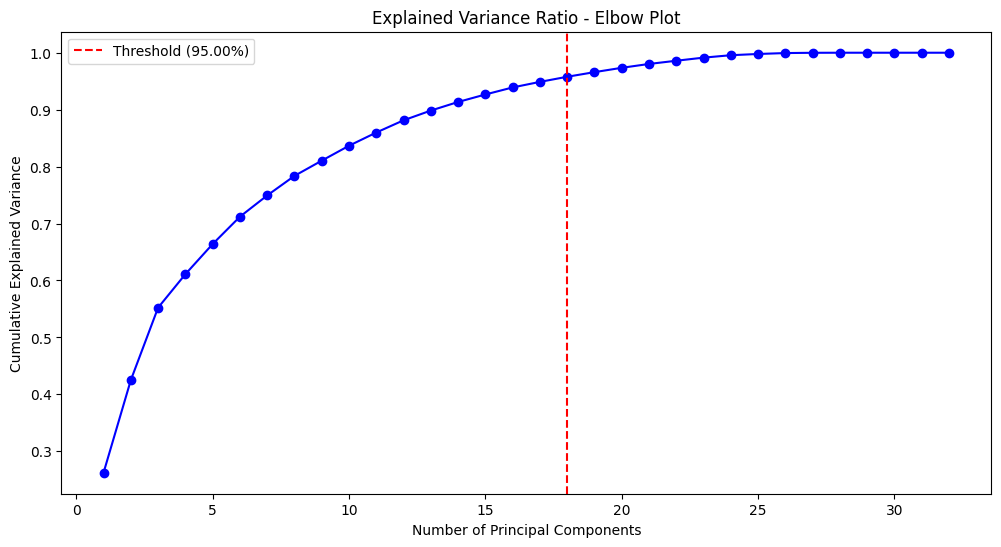

In [116]:
# Set the threshold for explained variance
variance_threshold = 0.95

# Step 1: Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_coor)

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_normalized)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Identify the index where cumulative variance first surpasses the threshold
num_components_threshold = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1

# Plot the explained variance ratio (Elbow Plot) with a line indicating the threshold
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.axvline(x=num_components_threshold, color='r', linestyle='--', label=f'Threshold ({variance_threshold*100:.2f}%)')
plt.title('Explained Variance Ratio - Elbow Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.savefig('images/PCA_elbow.png')
plt.show()

In [111]:
num_components_threshold

18

In [112]:
# Assuming X_pca is a DataFrame with principal components
X_pca = pd.DataFrame(X_pca)
# Keep only the first 18 principal components
X_pca = X_pca.iloc[:, :18]
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.349449,-1.672174,-0.339356,-1.995607,0.106948,-1.603525,1.956397,0.018014,-0.118627,-0.113256,-0.717055,0.257143,1.101532,-0.618825,0.479906,0.725032,-0.696957,-0.446415
1,3.086950,-2.545378,0.775685,-0.811237,-1.575662,-2.271414,0.398823,-0.534087,-0.401293,-0.316021,0.490932,-0.149166,-1.150078,-1.337468,-1.266542,-0.079918,0.136025,0.610440
2,-2.147439,-2.031974,-0.023908,0.527266,-0.891402,-1.552983,-0.593549,0.158379,-0.762241,-0.283111,0.379949,0.454306,-0.493115,0.851702,-0.071916,-0.823515,-0.159384,0.041934
3,-2.147439,-2.031974,-0.023908,0.527266,-0.891402,-1.552983,-0.593549,0.158379,-0.762241,-0.283111,0.379949,0.454306,-0.493115,0.851702,-0.071916,-0.823515,-0.159384,0.041934
4,-3.910903,-1.361944,-2.982788,0.686778,1.771020,0.497867,-0.989107,-1.328108,0.086704,-0.126540,0.451558,0.700483,0.011493,0.172654,-0.579836,0.202268,-0.300386,0.055008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,-1.741782,2.003373,-1.881857,0.374429,0.826020,0.306216,0.092674,-0.441509,0.286975,-0.562739,0.285294,-0.643979,-0.471630,-0.610926,-0.950911,0.110082,-0.576424,-0.157133
1490,-1.741782,2.003373,-1.881857,0.374429,0.826020,0.306216,0.092674,-0.441509,0.286975,-0.562739,0.285294,-0.643979,-0.471630,-0.610926,-0.950911,0.110082,-0.576424,-0.157133
1491,3.506382,-0.981513,1.287179,0.372944,-0.222329,1.095080,-0.913652,-0.676124,0.606743,-0.122255,1.146716,0.341081,0.239120,-0.877720,0.082302,0.572968,-1.018767,-0.438186
1492,3.480661,-1.257486,1.383272,-0.057683,-0.556681,0.950111,-1.045357,-0.436738,0.776624,-0.230912,1.165866,0.291728,0.293646,-0.717161,0.038305,0.752900,-1.035170,-0.147256


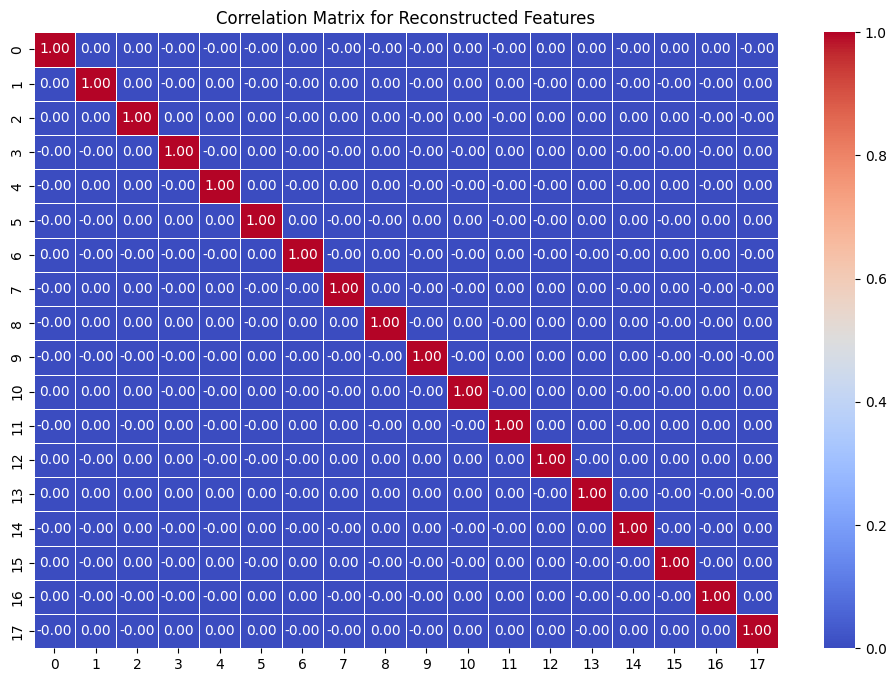

In [115]:
# Plotting the correlation heatmap for the reconstructed features
correlation_matrix_reconstructed = X_pca.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_reconstructed, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Reconstructed Features')
plt.savefig('images/correlation_matrix_PCA.png')
plt.show()